# Parameterization of the mean flux

The mean transmitted flux fraction, or mean flux, is one of the main nuisances in Lyman alpha analyses. 

In this notebook we discuss possible parameterizations of the mean flux, and choose priors for the parameters.

There are several parameterizations possible:
 - On one extreme, we could decide to have a free parameter $\bar{F}_i$ for each redshift bin, for a total of 10-12 parameters.
 - On the other extreme, we could describe it as a power law in effective optical depth, $\tau_{\rm eff} = \log \bar{F}$, i.e., $\ln \tau_{\rm eff}(z) = \ln \tau_\star + n_\tau \ln \left( \frac{1+z}{1+z_\star} \right) $.
 - We will probably end up using something in between, like a low-order polynomial in log optical depth. 
 
For this notebook, we will use three parameters to describe the mean flux:
$$ \ln \tau_{\rm eff}(z) = \ln \tau_\star + n_\tau \ln \left( \frac{1+z}{1+z_\star} \right) + \alpha_\tau \ln^2 \left( \frac{1+z}{1+z_\star} \right) $$

The nuisance parameters, therefore, will be 
$$ \phi = \{ \tau_\star , n_\tau , \alpha_\tau \} $$

In [1]:
%matplotlib inline
import numpy as np
## Set default plot size, as normally its a bit too small
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120

In [2]:
def mean_flux_Becker2013(z):
    return np.exp(-0.751*(((1+z)/4.5)**2.9)+0.132)

In [3]:
def mean_flux_mock(z):
    return np.exp((np.log(0.8))*(((1+z)/3.25)**3.2))

In [4]:
def mean_flux_SDSS(z):
    return np.exp((np.log(0.69))*(((1+z)/4.0)**3.3))

In [5]:
def mean_flux_eBOSS(z):
    return np.exp(-0.0055*(1+z)**3.18)

In [6]:
def tau_effective(z,z_star=3,tau_star=-np.log(0.65),n_tau=3.3,alpha_tau=0):
    x = np.log((1+z)/(1+z_star))
    ln_tau = np.log(tau_star) + n_tau*x + alpha_tau*x**2
    return np.exp(ln_tau)

In [7]:
# compare mean flux model to those in the literature
z=np.linspace(2.0,5.0,100)
mf_2013=mean_flux_Becker2013(z)
mf_SDSS=mean_flux_SDSS(z)
mf_mock=mean_flux_mock(z)
mf_eBOSS=mean_flux_eBOSS(z)
# specify values for fiducial model of mean flux
z_star=3
tau_star_fid=0.42
n_tau_fid=3.5
alpha_tau_fid=-1.
tau_eff_fid=tau_effective(z,z_star,tau_star_fid,n_tau_fid,alpha_tau_fid)

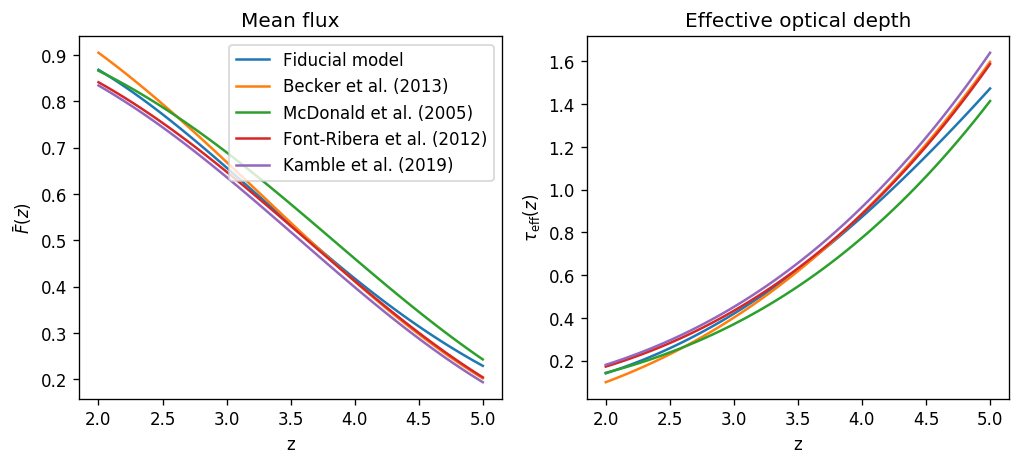

In [8]:
# plot mean flux and effective optical depth for fiducial model
plt.figure(figsize=[10,4])
# start with mean flux
plt.subplot(1, 2, 1)
plt.plot(z,np.exp(-tau_eff_fid),label='Fiducial model')
plt.plot(z,mf_2013,label='Becker et al. (2013)')
plt.plot(z,mf_SDSS,label='McDonald et al. (2005)')
plt.plot(z,mf_mock,label='Font-Ribera et al. (2012)')
plt.plot(z,mf_eBOSS,label='Kamble et al. (2019)')
plt.xlabel('z')
plt.ylabel(r'$\bar{F}(z)$')
plt.title('Mean flux')
plt.legend()
# now effective optical depth
plt.subplot(1, 2, 2)
plt.plot(z,tau_eff_fid,label='Fiducial model')
plt.plot(z,-np.log(mf_2013),label='Becker et al. (2013)')
plt.plot(z,-np.log(mf_SDSS),label='McDonald et al. (2005)')
plt.plot(z,-np.log(mf_mock),label='Font-Ribera et al. (2012)')
plt.plot(z,-np.log(mf_eBOSS),label='Kamble et al. (2019)')
plt.xlabel('z')
plt.ylabel(r'$\tau_{\rm eff}(z)$')
plt.title('Effective optical depth')
#plt.legend()

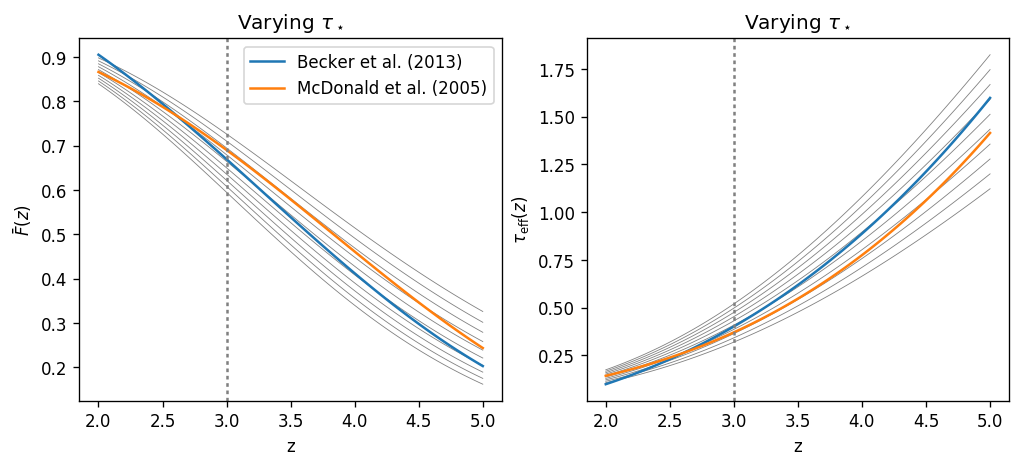

In [9]:
# vary tau_star
plt.figure(figsize=[10,4])
# start with mean flux
plt.subplot(1, 2, 1)
dtau=0.1
tau_star=np.linspace(tau_star_fid-dtau,tau_star_fid+dtau,10)
for tau in tau_star:
    tau_eff=tau_effective(z,z_star,tau,n_tau_fid,alpha_tau_fid)
    plt.plot(z,np.exp(-tau_eff),color='gray',lw=0.5)
plt.plot(z,mf_2013,label='Becker et al. (2013)')
plt.plot(z,mf_SDSS,label='McDonald et al. (2005)')
plt.axvline(x=3.0,ls=':',color='gray')
plt.xlabel('z')
plt.ylabel(r'$\bar{F}(z)$')
plt.title(r'Varying $\tau_\star$')
plt.legend()
# now effective optical depth
plt.subplot(1, 2, 2)
for tau in tau_star:
    tau_eff=tau_effective(z,z_star,tau,n_tau_fid,alpha_tau_fid)
    plt.plot(z,tau_eff,color='gray',lw=0.5)
plt.plot(z,-np.log(mf_2013),label='Becker et al. (2013)')
plt.plot(z,-np.log(mf_SDSS),label='McDonald et al. (2005)')
plt.axvline(x=3.0,ls=':',color='gray')
plt.xlabel('z')
plt.ylabel(r'$\tau_{\rm eff}(z)$')
plt.title(r'Varying $\tau_\star$')
#plt.legend()

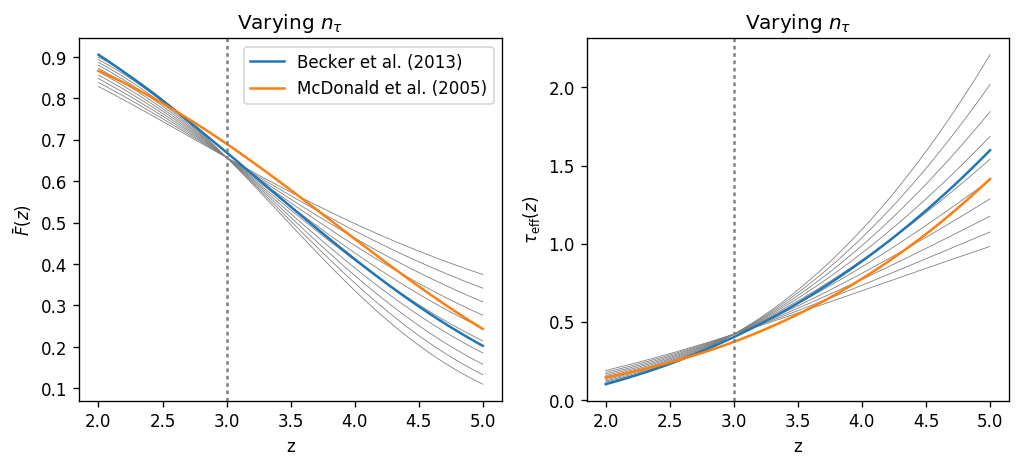

In [10]:
# vary n_tau
plt.figure(figsize=[10,4])
# start with mean flux
plt.subplot(1, 2, 1)
dn_tau=1.0
n_tau=np.linspace(n_tau_fid-dn_tau,n_tau_fid+dn_tau,10)
for n in n_tau:
    tau_eff=tau_effective(z,z_star,tau_star_fid,n,alpha_tau_fid)
    plt.plot(z,np.exp(-tau_eff),color='gray',lw=0.5)
plt.plot(z,mf_2013,label='Becker et al. (2013)')
plt.plot(z,mf_SDSS,label='McDonald et al. (2005)')
plt.axvline(x=3.0,ls=':',color='gray')
plt.xlabel('z')
plt.ylabel(r'$\bar{F}(z)$')
plt.title(r'Varying $n_\tau$')
plt.legend()
# now effective optical depth
plt.subplot(1, 2, 2)
for n in n_tau:
    tau_eff=tau_effective(z,z_star,tau_star_fid,n,alpha_tau_fid)
    plt.plot(z,tau_eff,color='gray',lw=0.5)
plt.plot(z,-np.log(mf_2013),label='Becker et al. (2013)')
plt.plot(z,-np.log(mf_SDSS),label='McDonald et al. (2005)')
plt.axvline(x=3.0,ls=':',color='gray')
plt.xlabel('z')
plt.ylabel(r'$\tau_{\rm eff}(z)$')
plt.title(r'Varying $n_\tau$')
#plt.legend()

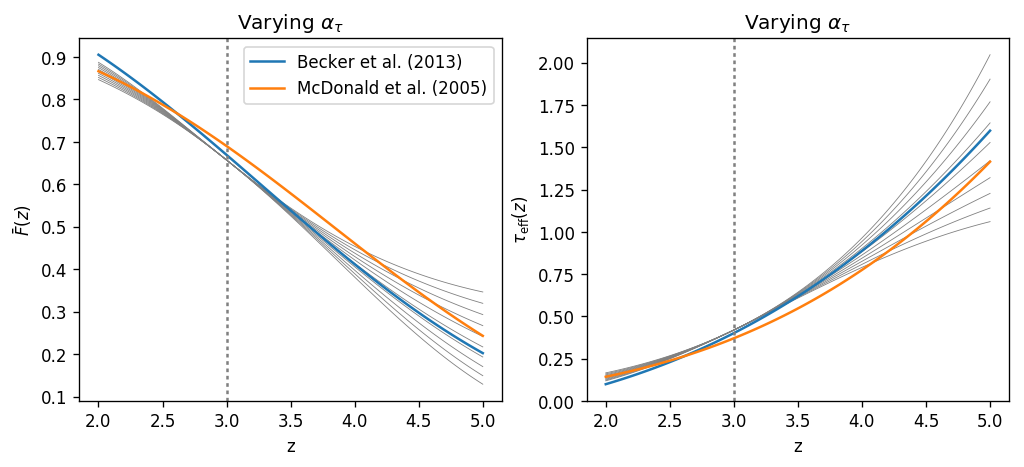

In [11]:
# vary alpha_tau
plt.figure(figsize=[10,4])
# start with mean flux
plt.subplot(1, 2, 1)
dalpha=2.0
alpha_tau=np.linspace(alpha_tau_fid-dalpha,alpha_tau_fid+dalpha,10)
for alpha in alpha_tau:
    tau_eff=tau_effective(z,z_star,tau_star_fid,n_tau_fid,alpha)
    plt.plot(z,np.exp(-tau_eff),color='gray',lw=0.5)
plt.plot(z,mf_2013,label='Becker et al. (2013)')
plt.plot(z,mf_SDSS,label='McDonald et al. (2005)')
plt.axvline(x=3.0,ls=':',color='gray')
plt.xlabel('z')
plt.ylabel(r'$\bar{F}(z)$')
plt.title(r'Varying $\alpha_\tau$')
plt.legend()
# now effective optical depth
plt.subplot(1, 2, 2)
for alpha in alpha_tau:
    tau_eff=tau_effective(z,z_star,tau_star_fid,n_tau_fid,alpha)
    plt.plot(z,tau_eff,color='gray',lw=0.5)
plt.plot(z,-np.log(mf_2013),label='Becker et al. (2013)')
plt.plot(z,-np.log(mf_SDSS),label='McDonald et al. (2005)')
plt.axvline(x=3.0,ls=':',color='gray')
plt.xlabel('z')
plt.ylabel(r'$\tau_{\rm eff}(z)$')
plt.title(r'Varying $\alpha_\tau$')
#plt.legend()

### Priors for the mean flux parameters 

For now we will use top hat priors for the three nuisance parameters, roughly based on previous mean flux measurements:
$$ 0.32 < \tau_\star < 0.52  \qquad \qquad  2.5 < n_\tau < 4.5  \qquad \qquad   -3.0 < \alpha_\tau < 1.0 $$ 

In [12]:
print(tau_star_fid-dtau,'< tau_star <',tau_star_fid+dtau)
print(n_tau_fid-dn_tau,'< n_tau <',n_tau_fid+dn_tau)
print(alpha_tau_fid-dalpha,'< alpha_tau <',alpha_tau_fid+dalpha)

0.31999999999999995 < tau_star < 0.52
2.5 < n_tau < 4.5
-3.0 < alpha_tau < 1.0
